# Polarized Electrogowdy spacetimes censored by Nungesser
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 22, 2022

Here we only derive the vacuum field equations.  Will come back later, define stress energy tensors, and take its divergence which should give remaining equation 7.

https://arxiv.org/pdf/0912.0643.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,theta,x,y,dt,dtheta,dx,dy = symbols('t theta x y dt dtheta dx dy')

In [4]:
Lambda = Function('lambda')(t,theta)
Lambda

In [9]:
lambdaBar = Function('lambda_b')(t,theta)
lambdaBar

In [5]:
P = Function('P')(t,theta)
P

In [15]:
p = Function('p')(t,theta)
p

In [10]:
variables = Matrix([t,theta,x,y])
variables

⎡t⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [11]:
differentials = Matrix([dt,dtheta,dx,dy])
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢  dx  ⎥
⎢      ⎥
⎣  dy  ⎦

In [30]:
lineElement1 = t**(Rational(-1,2)) * exp(Lambda/2)*(-dt**2 + dtheta**2) + t*(exp(p)*dx**2 + exp(-p)*dy**2)
lineElement1

In [17]:
equation4 = Eq(P, Rational(1,2)*( p - log(t)))
equation4

In [23]:
pReplace = Eq(p,solve(equation4, p)[0])
pReplace

In [19]:
equation5 = Eq(lambdaBar, Rational(1,4)*(Lambda - log(t)) - p )
equation5

In [26]:
lambdaReplace = Eq(Lambda,solve(equation5,Lambda)[0] ) 
lambdaReplace

In [31]:
lineElement = expand( lineElement1.subs(pReplace.lhs,pReplace.rhs).subs(lambdaReplace.lhs,lambdaReplace.rhs) ) 
lineElement 

In [32]:
#  This matches equation 10
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅λ_b(t, θ)  2⋅p(t, θ)                                                     ⎤
⎢-ℯ           ⋅ℯ                      0                   0             0     ⎥
⎢                                                                             ⎥
⎢                           2⋅λ_b(t, θ)  2⋅p(t, θ)                            ⎥
⎢           0              ℯ           ⋅ℯ                 0             0     ⎥
⎢                                                                             ⎥
⎢                                                    2  2⋅P(t, θ)             ⎥
⎢           0                         0             t ⋅ℯ                0     ⎥
⎢                                                                             ⎥
⎢                                                                   -2⋅P(t, θ)⎥
⎣           0                         0                   0        ℯ          ⎦

In [33]:
import sympy

In [34]:
m = sympy.Array(g)
m

⎡  2⋅λ_b(t, θ)  2⋅p(t, θ)                                                     ⎤
⎢-ℯ           ⋅ℯ                      0                   0             0     ⎥
⎢                                                                             ⎥
⎢                           2⋅λ_b(t, θ)  2⋅p(t, θ)                            ⎥
⎢           0              ℯ           ⋅ℯ                 0             0     ⎥
⎢                                                                             ⎥
⎢                                                    2  2⋅P(t, θ)             ⎥
⎢           0                         0             t ⋅ℯ                0     ⎥
⎢                                                                             ⎥
⎢                                                                   -2⋅P(t, θ)⎥
⎣           0                         0                   0        ℯ          ⎦

In [35]:
from einsteinpy.symbolic import *

In [36]:
syms = sympy.symbols("t theta x y")
t,theta,x,y = syms

In [37]:
metric = MetricTensor(m,syms)

In [38]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂               ∂            ∂               ∂                                                                                       
⎢⎢──(λ_b(t, θ)) + ──(p(t, θ))  ──(λ_b(t, θ)) + ──(p(t, θ))                              0                                              
⎢⎢∂t              ∂t           ∂θ              ∂θ                                                                                      
⎢⎢                                                                                                                                     
⎢⎢∂               ∂            ∂               ∂                                                                                       
⎢⎢──(λ_b(t, θ)) + ──(p(t, θ))  ──(λ_b(t, θ)) + ──(p(t, θ))                              0                                              
⎢⎢∂θ              ∂θ           ∂t              ∂t                                                                                      
⎢⎢                                              

In [39]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛                 2     2                2                2              2         ⎞                                                
⎢  ⎜    ⎛∂          ⎞     ∂                ∂                ∂              ∂          ⎟     ∂             ∂               ∂            
⎢t⋅⎜- 2⋅⎜──(P(t, θ))⎟  - ───(λ_b(t, θ)) + ───(λ_b(t, θ)) - ───(p(t, θ)) + ───(p(t, θ))⎟ - 2⋅──(P(t, θ)) + ──(λ_b(t, θ)) + ──(p(t, θ))  
⎢  ⎜    ⎝∂t         ⎠      2                2                2              2         ⎟     ∂t            ∂t              ∂t           
⎢  ⎝                     ∂t               ∂θ               ∂t             ∂θ          ⎠                                                
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  
⎢                                                                 t                                                                    
⎢                                               

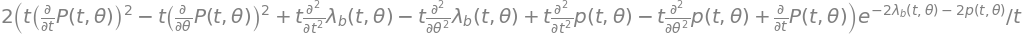

In [40]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [41]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛                 2     2                2                2              2         ⎞                                                
⎢  ⎜    ⎛∂          ⎞     ∂                ∂                ∂              ∂          ⎟     ∂             ∂               ∂            
⎢t⋅⎜- 2⋅⎜──(P(t, θ))⎟  - ───(λ_b(t, θ)) + ───(λ_b(t, θ)) - ───(p(t, θ)) + ───(p(t, θ))⎟ - 2⋅──(P(t, θ)) + ──(λ_b(t, θ)) + ──(p(t, θ))  
⎢  ⎜    ⎝∂t         ⎠      2                2                2              2         ⎟     ∂t            ∂t              ∂t           
⎢  ⎝                     ∂t               ∂θ               ∂t             ∂θ          ⎠                                                
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── +
⎢                                                                 t                                                                    
⎢                                               

In [42]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [43]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [44]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛               2     2                2                2              2         ⎞                                                
⎢    ⎜  ⎛∂          ⎞     ∂                ∂                ∂              ∂          ⎟     ∂             ∂               ∂            
⎢- t⋅⎜2⋅⎜──(P(t, θ))⎟  + ───(λ_b(t, θ)) - ───(λ_b(t, θ)) + ───(p(t, θ)) - ───(p(t, θ))⎟ - 2⋅──(P(t, θ)) + ──(λ_b(t, θ)) + ──(p(t, θ))  
⎢    ⎜  ⎝∂t         ⎠      2                2                2              2         ⎟     ∂t            ∂t              ∂t           
⎢    ⎝                   ∂t               ∂θ               ∂t             ∂θ          ⎠                                                
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  
⎢                                                                 t                                                                    
⎢                                               

In [45]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡    ⎛                 2                  2                                            ⎞                                               
⎢    ⎜    ⎛∂          ⎞      ⎛∂          ⎞    ∂             ∂               ∂          ⎟               ∂           ∂             ∂     
⎢1.0⋅⎜- t⋅⎜──(P(t, θ))⎟  - t⋅⎜──(P(t, θ))⎟  - ──(P(t, θ)) + ──(λ_b(t, θ)) + ──(p(t, θ))⎟         - 2⋅t⋅──(P(t, θ))⋅──(P(t, θ)) - ──(P(t
⎢    ⎝    ⎝∂t         ⎠      ⎝∂θ         ⎠    ∂t            ∂t              ∂t         ⎠               ∂t          ∂θ            ∂θ    
⎢───────────────────────────────────────────────────────────────────────────────────────         ──────────────────────────────────────
⎢                                           t                                                                                        t 
⎢                                                                                                                                      
⎢                                               

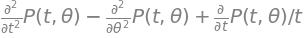

In [62]:
equation6 = expand((1/t)*ricciSimplified[2,2].args[1] ) 
equation6

In [61]:
equation8 = Eq(diff(lambdaBar,t),solve( einsteinSimplified[0,0], diff(lambdaBar,t))[0] ) 
equation8

In [60]:
equation9 = Eq(diff(lambdaBar,theta),solve( einsteinSimplified[1,0], diff(lambdaBar,theta) )[0] ) 
equation9

In [64]:
vacuumFieldEquations = Matrix([equation6,equation8,equation9])
vacuumFieldEquations

⎡                                                 ∂                             ⎤
⎢                     2              2            ──(P(t, θ))                   ⎥
⎢                    ∂              ∂             ∂t                            ⎥
⎢                   ───(P(t, θ)) - ───(P(t, θ)) + ───────────                   ⎥
⎢                     2              2                 t                        ⎥
⎢                   ∂t             ∂θ                                           ⎥
⎢                                                                               ⎥
⎢                               2                  2                            ⎥
⎢∂                 ⎛∂          ⎞      ⎛∂          ⎞    ∂             ∂          ⎥
⎢──(λ_b(t, θ)) = t⋅⎜──(P(t, θ))⎟  + t⋅⎜──(P(t, θ))⎟  + ──(P(t, θ)) - ──(p(t, θ))⎥
⎢∂t                ⎝∂t         ⎠      ⎝∂θ         ⎠    ∂t            ∂t         ⎥
⎢                                                                               ⎥
⎢    ∂          